# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

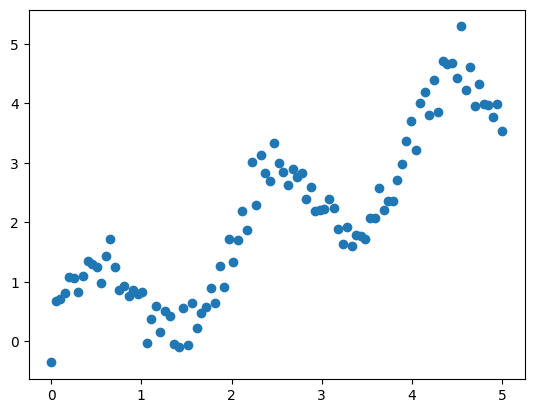

In [4]:
plt.scatter(x,y)

#### nonlinear

In [5]:
regr_lin = LinearRegression()

In [6]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [7]:
regr_lin.fit(X,y)

LinearRegression()

0.5186037902605338


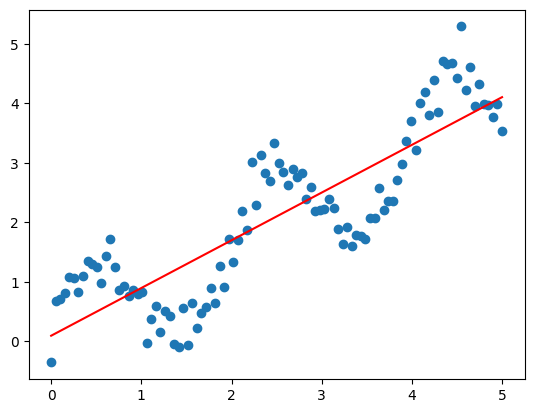

In [8]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [9]:
print(x.shape)

(100,)


In [10]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it，100筆資料且都有5個維度
print(X_poly.shape)

(100, 5)


In [11]:
regr_poly = LinearRegression()

In [12]:
regr_poly.fit(X_poly, y)

LinearRegression()

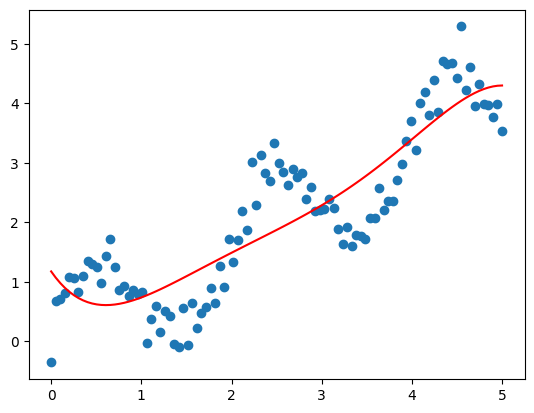

In [13]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [14]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.2005871   2.71793602 -1.17757921  0.24029119 -0.01817737]
interception:  1.1750298916771431


In [15]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b#因為是矩陣，所以需要轉置

array([1.17502989, 1.07067179, 0.97929078, 0.90003203, 0.83207681,
       0.77464173, 0.72697809, 0.68837111, 0.65813923, 0.63563339,
       0.62023635, 0.61136189, 0.6084542 , 0.61098706, 0.61846319,
       0.63041353, 0.64639647, 0.66599722, 0.68882699, 0.71452237,
       0.74274455, 0.77317862, 0.80553287, 0.83953805, 0.87494666,
       0.91153226, 0.94908869, 0.98742943, 1.02638683, 1.06581139,
       1.10557111, 1.14555068, 1.18565082, 1.22578758, 1.26589156,
       1.30590723, 1.34579225, 1.38551667, 1.42506228, 1.46442187,
       1.5035985 , 1.54260483, 1.58146234, 1.62020066, 1.65885682,
       1.69747458, 1.73610366, 1.77479905, 1.81362029, 1.85263077,
       1.89189699, 1.93148782, 1.97147386, 2.01192664, 2.05291796,
       2.09451915, 2.13680035, 2.1798298 , 2.22367312, 2.26839261,
       2.3140465 , 2.36068826, 2.40836589, 2.45712116, 2.50698894,
       2.55799646, 2.61016261, 2.6634972 , 2.71800024, 2.77366127,
       2.83045859, 2.88835857, 2.94731493, 3.00726801, 3.06814

In [16]:
regr_poly.predict(X_poly)

array([1.17502989, 1.07067179, 0.97929078, 0.90003203, 0.83207681,
       0.77464173, 0.72697809, 0.68837111, 0.65813923, 0.63563339,
       0.62023635, 0.61136189, 0.6084542 , 0.61098706, 0.61846319,
       0.63041353, 0.64639647, 0.66599722, 0.68882699, 0.71452237,
       0.74274455, 0.77317862, 0.80553287, 0.83953805, 0.87494666,
       0.91153226, 0.94908869, 0.98742943, 1.02638683, 1.06581139,
       1.10557111, 1.14555068, 1.18565082, 1.22578758, 1.26589156,
       1.30590723, 1.34579225, 1.38551667, 1.42506228, 1.46442187,
       1.5035985 , 1.54260483, 1.58146234, 1.62020066, 1.65885682,
       1.69747458, 1.73610366, 1.77479905, 1.81362029, 1.85263077,
       1.89189699, 1.93148782, 1.97147386, 2.01192664, 2.05291796,
       2.09451915, 2.13680035, 2.1798298 , 2.22367312, 2.26839261,
       2.3140465 , 2.36068826, 2.40836589, 2.45712116, 2.50698894,
       2.55799646, 2.61016261, 2.6634972 , 2.71800024, 2.77366127,
       2.83045859, 2.88835857, 2.94731493, 3.00726801, 3.06814

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [17]:
# normal distrubution
# 看成多個常態分佈
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [18]:
sigma = 0.3

In [19]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [20]:
regr_rbf = LinearRegression()

In [21]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

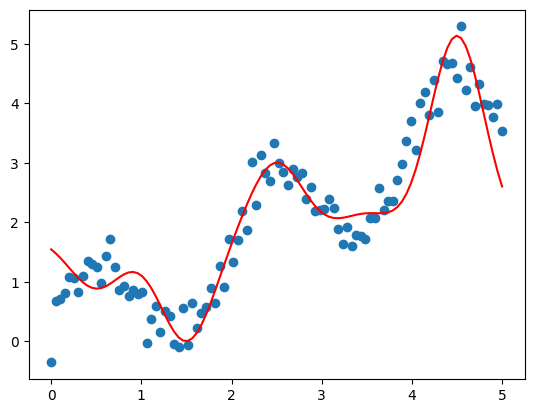

In [22]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [23]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.86974096 -1.76152308  1.24737241  0.37283976  3.37375637]
interception:  1.7622907818723073


#### Comparison

In [24]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

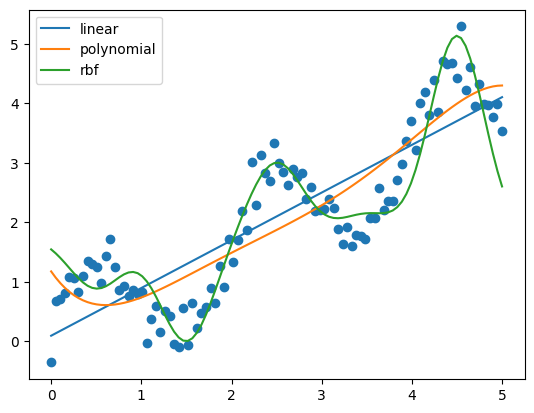

In [25]:
plt.scatter(x,y)
#換種資料表達方式去算機器學習
plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [26]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5186037902605338


In [27]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.44326940959443223


In [28]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2112605728228317
